# Data Wrangling and Preprocessing
First we need to set up our Python environment for preprocessing the data and do some housekeeping

## Preparing environment and importing raw data

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import and concat each csv file
df_b = pd.read_csv("../data/Luma-Meta-Apr-1-2024-to-Jun-30-2024.csv")
df_a = pd.read_csv("../data/Luma-Meta-Jan-1-2024-to-Mar-31-2024.csv")
df_concatenated = pd.concat([df_a, df_b]).iloc[:, :-2]

start_date = "2024-01-01"
end_date = "2024-06-30"

df_concatenated.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41026 entries, 0 to 19491
Data columns (total 44 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Ads                                                                      41024 non-null  object 
 1   Age                                                                      41024 non-null  object 
 2   Gender                                                                   41024 non-null  object 
 3   Day                                                                      41024 non-null  object 
 4   Reach                                                                    40695 non-null  float64
 5   Impressions                                                              40870 non-null  float64
 6   Frequency                                                                40

## Managing missing data
We will first eliminate any features with less than 1000 non-null values.   

We will then eliminate any rows where the value for 'Ads' is null (Ads is the name of the creative asset)

Finally we will create a function that returns a dataframe summarizing the unique values, non-null count, and sum of numerical values. This will be re-used throughout the notebook to quality check data cleaning operations.

In [3]:
# splice any column containing a null value
null_columns = df_concatenated.columns[df_concatenated.isnull().any()].tolist()

# list column names where there are less than 1000 non-null values
drop_feature_names = [feat for feat, value in zip(null_columns, df_concatenated[null_columns].count() < 1000) if value]
drop_column_names = list(drop_feature_names)
print(drop_column_names)

df_dropped = df_concatenated.drop(drop_column_names, axis=1) # drop columns with less than 1000 non-null values
df_dropped = df_dropped.dropna(subset=['Ads']) # drop rows with null values in the 'Ads' column

['Follows or likes', 'Post comments', 'Cost per follow or like', 'Adds to wishlist', 'Cost per add to wishlist']


In [4]:
# create a summary of the unique values, count of non-null values, and sum of numerical values
def create_summary(data):
    """
    Creates a summary of the unique values, count of non-null values, and sum of numerical values.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame to be summarized.
    
    Returns:
    pd.DataFrame: A DataFrame summarizing the input data.
    """
    summary_dict = {'cols': data.columns, 'unique': [], 'count': [], 'sum': []}
    
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
            summary_dict["sum"].append(data[col].sum())
        elif pd.api.types.is_datetime64_any_dtype(data[col]):  # Check if the column is datetime
            summary_dict["sum"].append((data[col].min(), data[col].max()))
        else:
            summary_dict["sum"].append(np.nan)

        summary_dict['unique'].append(data[col].nunique())
        summary_dict['count'].append(data[col].count())

    summary_df = pd.DataFrame.from_dict(summary_dict)
    
    return summary_df

In [5]:
create_summary(df_dropped)

,cols,unique,count,sum
0,Ads,80,41024,NaN
1,Age,7,41024,NaN
2,Gender,3,41024,NaN
3,Day,182,41024,NaN
4,Reach,1696,40693,5.237801e+06
5,Impressions,2161,40868,7.503042e+06
6,Frequency,9365,40693,5.774209e+04
7,Currency,1,41024,NaN
8,Amount spent (USD),17818,39135,1.793492e+05
9,Attribution setting,1,41024,NaN


## Ad hoc data engineering
There are some features that remain unusable for the purposes of machine learning. For example Age is an obscure data type, and it represents age ranges; in this case we will encode this feature into categorical bins representing each age range. 

In [6]:
data = df_dropped.copy()

### Encoding Age into categorical bins
We'll usethe following mapping for our age ranges 

Mappings:  
    '18-24' -> 1  
    '25-34' -> 2  
    '35-44' -> 3  
    '45-54' -> 4  
    '55-64' -> 5  
    '65+'   -> 6  
    Others  -> 0

In [7]:
# A dictionary to reference Age categories
age_range_dict = {
    1: (18,24),
    2: (25,34),
    3: (35,44),
    4: (45,54),
    5: (55,64),
    6: (65, 100),
    0: None
} 

In [8]:
# A function to encode Age into categorical values
def map_age_to_numeric(age):
    """
    Maps age range strings to numerical categories.

    This function takes an age range as a string (e.g., '18-24', '25-34') and
    returns a corresponding integer value. If the age range does not match any 
    predefined category, it returns 0.

    Parameters:
    age (str): The age range as a string.

    Returns:
    int: The numerical category corresponding to the age range.

    Mappings:
    '18-24' -> 1
    '25-34' -> 2
    '35-44' -> 3
    '45-54' -> 4
    '55-64' -> 5
    '65+'   -> 6
    Others  -> 0
    """
    
    if age == '18-24':
        return 1
    elif age == '25-34':
        return 2
    elif age == '35-44':
        return 3
    elif age == '45-54':
        return 4
    elif age == '55-64':
        return 5
    elif age == '65+':
        return 6
    else:
        return 0

In [9]:
# Apply the encoding function to the 'Age' column
encoded_age_series = data['Age'].apply(map_age_to_numeric)

# Check the encoded values
# print("Encoded Age Series:")
# print(encoded_age_series)

# Replace the original 'Age' column with the encoded column
data['Age'] = encoded_age_series

# Verify the transformation
print("Encoded 'Age' Column:")
print(data['Age'])

Encoded 'Age' Column:
1        4
2        5
3        2
4        3
5        3
        ..
19487    5
19488    5
19489    6
19490    6
19491    6
Name: Age, Length: 41024, dtype: int64


### Encoding gender into categorical bins
We'll usethe following mapping for our age ranges 

Mappings:  
    'male' -> 1  
    'female' -> 2  
    'unknown' -> 0  

In [10]:
# a function that maps gender to categorical bins
def map_gender_to_numeric(gender):
    """
    Maps gender strings to numerical categories.

    This function takes a gender string ('male', 'female', 'unknown') and
    returns a corresponding integer value. If the gender does not match any 
    predefined category, it returns 0.

    Parameters:
    gender (str): The gender as a string.

    Returns:
    int: The numerical category corresponding to the gender.

    Mappings:
    'male' -> 1
    'female' -> 2
    'unknown' -> 0
    """
    if gender == 'male':
        return 1
    elif gender == 'female':
        return 2
    else:
        return 0

In [11]:
# Apply the encoding function to the 'Gender' column
encoded_gender_series = data['Gender'].apply(map_gender_to_numeric)

# Check the encoded values
# print("Encoded Gender Series:")
# print(encoded_gender_series)

# Replace the original 'Gender' column with the encoded column
data['Gender'] = encoded_gender_series

# Verify the transformation
print("Encoded 'Gender' Column:")
print(data['Gender'])

Encoded 'Gender' Column:
1        1
2        2
3        2
4        2
5        1
        ..
19487    1
19488    0
19489    2
19490    1
19491    0
Name: Gender, Length: 41024, dtype: int64


### Encoding Day feature to datetime format
For the sake aof modeling and plotting we'll go ahead and reformat the Day strings to datetime data types

In [12]:
# Convert 'Day' column to datetime format
data['Day'] = pd.to_datetime(data['Day'])

# Verify the transformation
print("'Day' column encoded as datetime:")
print(data['Day'])

'Day' column encoded as datetime:
1       2024-03-31
2       2024-03-31
3       2024-03-31
4       2024-03-31
5       2024-03-31
           ...    
19487   2024-04-01
19488   2024-04-01
19489   2024-04-01
19490   2024-04-01
19491   2024-04-01
Name: Day, Length: 41024, dtype: datetime64[ns]


### Encoding Ads into categorical bins
Ads represents the name of the creative that was run, there are 80 unique creatives in this data set so we'll reformat them into categorical bins and create a data dictionary to reference.  
Exact mappings will not be provided here do to the large volume of 'categories', the bins will be created iteratively

In [13]:
# reformating ads as strings
data['Ads'] = data['Ads'].astype(str)
data['Ads'].describe()

count                           41024
unique                             80
top       240104 V3 - Vid - LP - Copy
freq                             1593
Name: Ads, dtype: object

In [14]:
#creating a list of unique ads
unique_ads = list(data['Ads'].unique())
# ads_dict = {}

# Create a dictionary mapping each unique value to an integer starting from 1
ads_mapping_dict = {ad: i for i, ad in enumerate(unique_ads, start=1)}

# Apply the mapping to the 'Ads' column
data['Ads'] = data['Ads'].map(ads_mapping_dict)


In [15]:
# Verify the transformation
data['Ads'].describe()


count    41024.000000
mean        38.522158
std         26.400353
min          1.000000
25%         12.000000
50%         39.000000
75%         64.000000
max         80.000000
Name: Ads, dtype: float64

### Eliminating obviously extraneous features
There are two remaining features with only one unique value, and they clearly don't tell us much so we'll go ahead and drop them.  
Currency is simply USD and this doesn't tell us anything we don't already know.  
Attribution setting is entirely "7-day click", since this is the only value for the entire data set, it doesn't give us any useful information so we'll go ahead and drop it.

In [16]:
# Currency from raw data
data['Currency'].describe()

count     41024
unique        1
top         USD
freq      41024
Name: Currency, dtype: object

In [17]:
# Attribution setting from raw data
data['Attribution setting'].describe()

count           41024
unique              1
top       7-day click
freq            41024
Name: Attribution setting, dtype: object

In [18]:
# manually dropping selected features
data = data.drop(['Currency', 'Attribution setting'], axis=1)

print("Data after dropping 'Currency' and 'Attribution setting' columns:")
data.info() 

Data after dropping 'Currency' and 'Attribution setting' columns:
<class 'pandas.core.frame.DataFrame'>
Index: 41024 entries, 1 to 19491
Data columns (total 37 columns):
 #   Column                                                                   Non-Null Count  Dtype         
---  ------                                                                   --------------  -----         
 0   Ads                                                                      41024 non-null  int64         
 1   Age                                                                      41024 non-null  int64         
 2   Gender                                                                   41024 non-null  int64         
 3   Day                                                                      41024 non-null  datetime64[ns]
 4   Reach                                                                    40693 non-null  float64       
 5   Impressions                                                   

In [19]:
# creating a new variable to containt the ad hoc transformation
df_cleaned = data

# summarizing the ad hoc transformation
create_summary(df_cleaned)

,cols,unique,count,sum
0,Ads,80,41024,1580333
1,Age,7,41024,158131
2,Gender,3,41024,49410
3,Day,182,41024,"(2024-01-01 00:00:00, 2024-06-30 00:00:00)"
4,Reach,1696,40693,5237801.0
5,Impressions,2161,40868,7503042.0
6,Frequency,9365,40693,57742.092873
7,Amount spent (USD),17818,39135,179349.2
8,Clicks (all),159,16303,140690.0
9,CPC (all),11473,16275,22900.062353


## Managing correlations and colinearity 
First we will create a function that returns a heatmap to visualize the feature colinearity, this will help monitor how the colinearity is affected by our data cleaning techniques. 

Then, we will drop any features with a correlation coefficient greater than 0.8

In [20]:
def plot_correlation_heatmap(data, title="Correlation Matrix Heatmap"):
    """
    Plots a heatmap of the correlation matrix.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame with features to be evaluated.
    title (str): Title of the heatmap. Default is "Correlation Matrix Heatmap".
    """
    # Get the list of numeric features
    numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

    # Calculate the correlation matrix
    corr_matrix = data[numeric_features].corr().abs()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

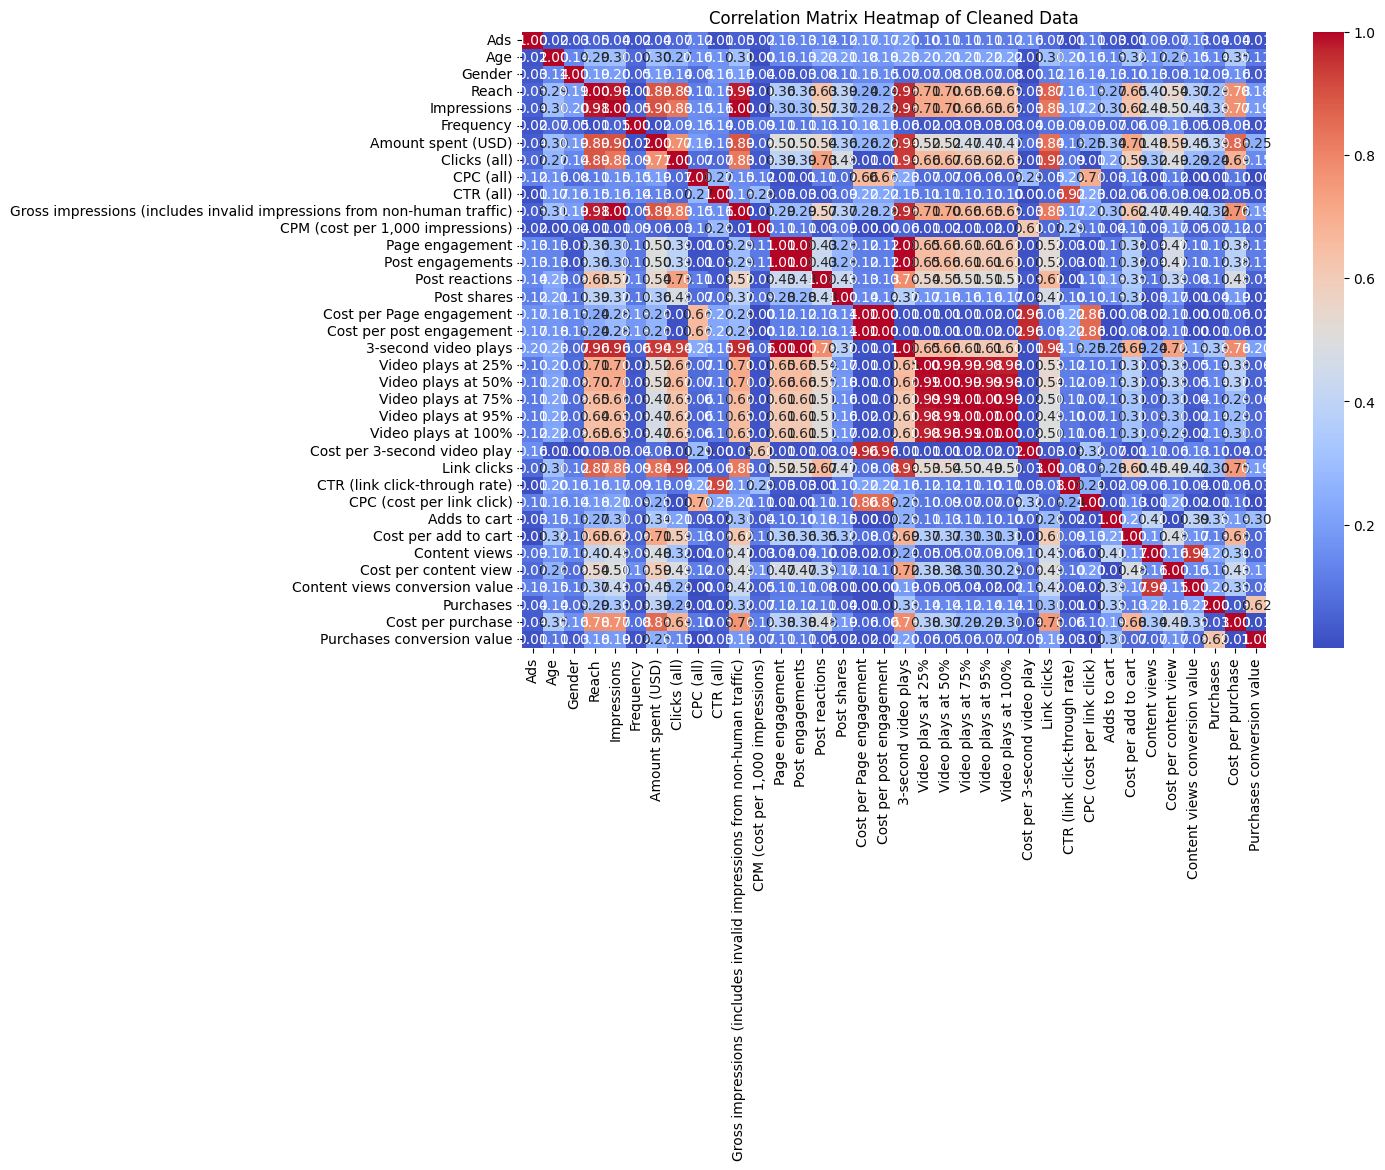

In [21]:
plot_correlation_heatmap(df_cleaned, title="Correlation Matrix Heatmap of Cleaned Data")

clearly this is a too much data to visualize cleanly using this method, however we can see some 'hotbeds' of highly colinear features. Let's reduce the dataset based on a colinearity threshold of 0.8

In [22]:
# Creating a variable to contain the cleaned data for ease of use
data = df_cleaned

In [23]:
# Calculate the correlation matrix
corr_matrix = data.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# Drop highly correlated features
data_reduced = data.drop(columns=to_drop)

# Check which features were dropped
print(f"Dropped features due to high collinearity: {to_drop}")

# preview the reduced data subset
df_reduced = create_summary(data_reduced)
df_reduced 

Dropped features due to high collinearity: ['Impressions', 'Amount spent (USD)', 'Clicks (all)', 'Gross impressions (includes invalid impressions from non-human traffic)', 'Post engagements', 'Cost per post engagement', '3-second video plays', 'Video plays at 50%', 'Video plays at 75%', 'Video plays at 95%', 'Video plays at 100%', 'Cost per 3-second video play', 'Link clicks', 'CTR (link click-through rate)', 'CPC (cost per link click)', 'Content views conversion value', 'Cost per purchase']


,cols,unique,count,sum
0,Ads,80,41024,1580333
1,Age,7,41024,158131
2,Gender,3,41024,49410
3,Day,182,41024,"(2024-01-01 00:00:00, 2024-06-30 00:00:00)"
4,Reach,1696,40693,5237801.0
5,Frequency,9365,40693,57742.092873
6,CPC (all),11473,16275,22900.062353
7,CTR (all),5310,16303,73153.961095
8,"CPM (cost per 1,000 impressions)",23663,39135,982261.171582
9,Page engagement,429,16867,279358.0


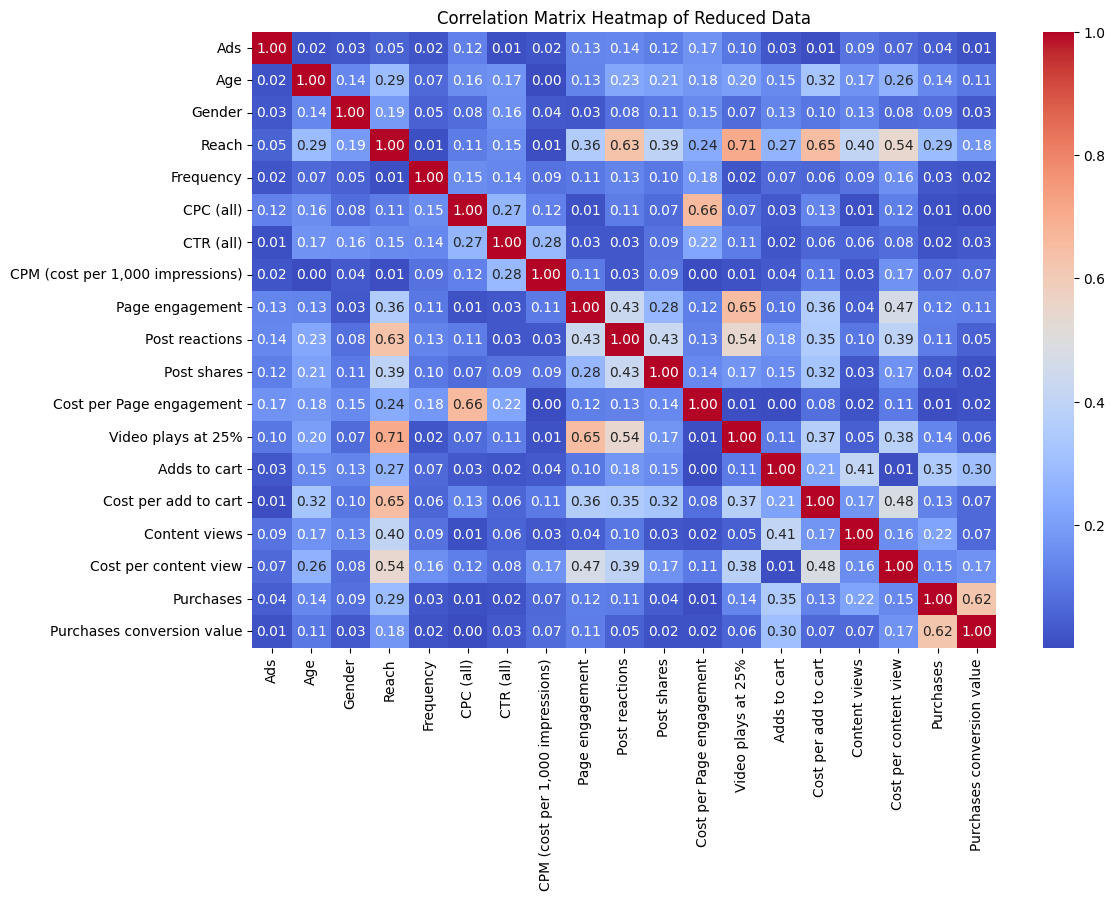

In [24]:
plot_correlation_heatmap(data_reduced, title="Correlation Matrix Heatmap of Reduced Data")

This is much more tenable both visualy and computationally. I'm happy with the results of our data preparation, we'll proceed with plotting the time series. 

# Timeseries visualization and analysis  
with sufficiently cleaned data we will plot a timeseries for each feature

## Timeseries EDA
First we will visualize and explore the data to get a handle on what we're facing

In [25]:
# creating a variable to hold the reduced data
timeseries_df = data_reduced.copy()

# setting the 'Day' column as the index
timeseries_df.set_index('Day', inplace=True)

timeseries_df.head()

,Ads,Age,Gender,Reach,Frequency,CPC (all),CTR (all),"CPM (cost per 1,000 impressions)",Page engagement,Post reactions,Post shares,Cost per Page engagement,Video plays at 25%,Adds to cart,Cost per add to cart,Content views,Cost per content view,Purchases,Purchases conversion value
Day,,,,,,,,,,,,,,,,,,,
2024-03-31,1,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2024-03-31,1,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2024-03-31,2,2,2,1.0,1.00,NaN,NaN,20.000000,1.0,NaN,NaN,0.02,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31,2,3,2,4.0,3.25,NaN,NaN,45.384615,1.0,NaN,NaN,0.59,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31,2,3,1,1.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


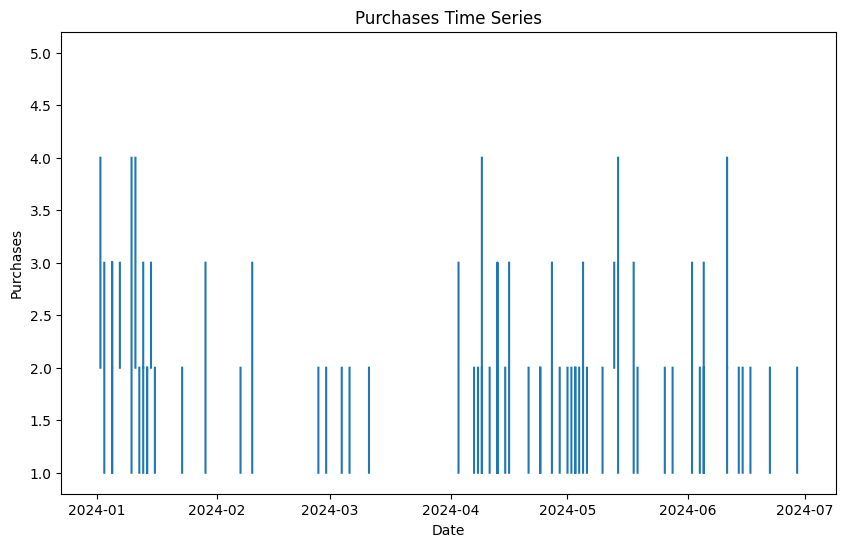

In [42]:
# Extract the date and impressions columns from the time series data
dates = timeseries_df.index
reach = timeseries_df['Purchases']


# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(dates, reach, linestyle='-')  # Explicitly specify line style and markers
plt.title('Purchases Time Series')
plt.xlabel('Date')
plt.ylabel('Purchases')
plt.show()

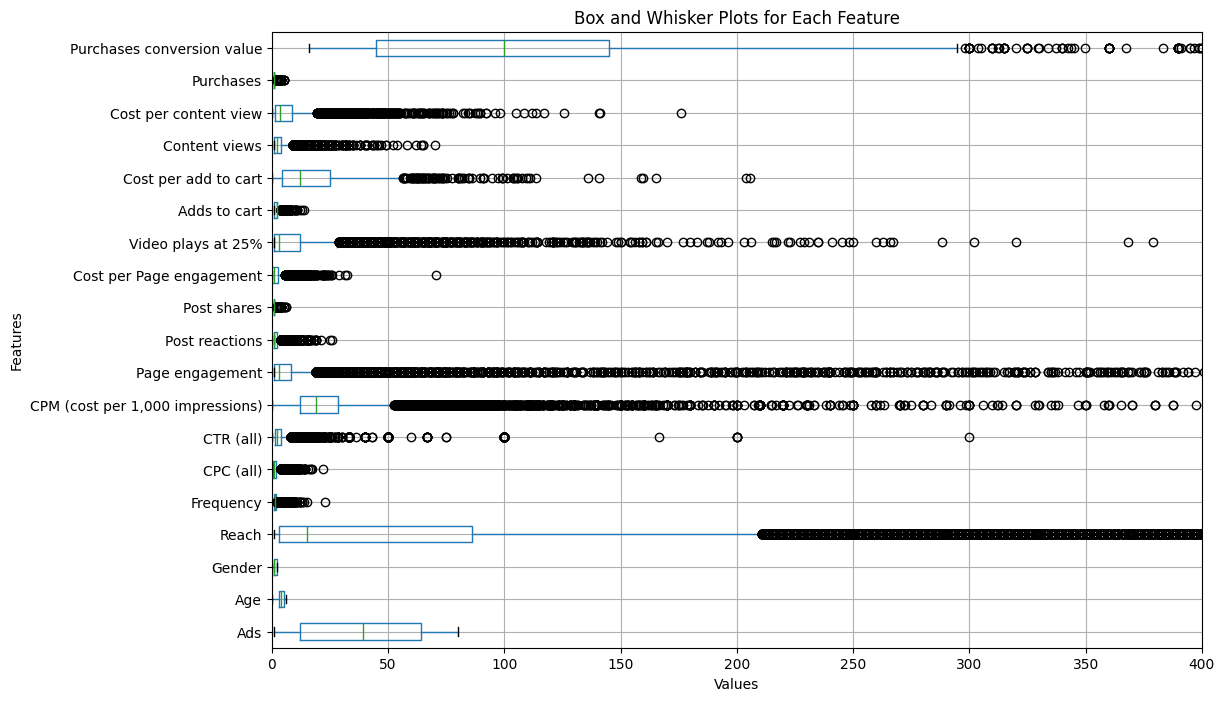

In [48]:
## Create a box and whisker plot for each feature
plt.figure(figsize=(12, 8))
data_reduced.boxplot(vert=False)
plt.title('Box and Whisker Plots for Each Feature')
plt.xlabel('Values')
plt.ylabel('Features')
plt.xlim(0, 400)  # Set the x-axis limit to zoom in
plt.show()

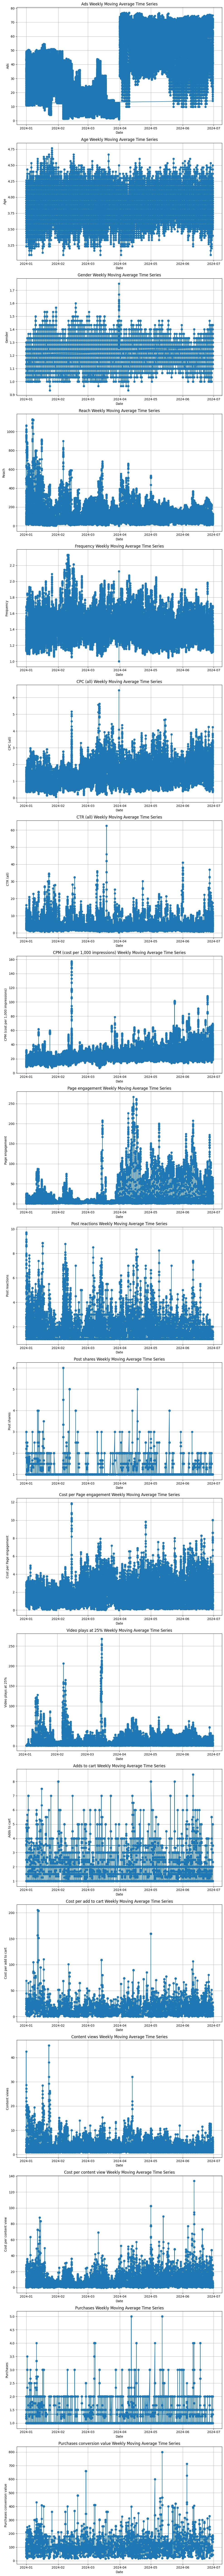

In [39]:
# Create subplots with a single column
num_features = len(monthly_moving_avg_df.columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6 * num_features))

# Ensure that axes is always iterable
if num_features == 1:
    axes = [axes]

# Plot each feature as a line plot
for ax, column in zip(axes, monthly_moving_avg_df.columns):
    filtered_data = monthly_moving_avg_df[column].dropna()  # Ignore NaNs for plotting
    ax.plot(filtered_data.index, filtered_data.values, linestyle='-', marker='o')
    ax.set_title(f'{column} Weekly Moving Average Time Series')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.grid(True)  # Add grid for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Filter out zero and NaN values for each column
timeseries_df.replace(0, pd.NA)  # Replace 0 with NaN for proper filtering

# Create subplots with a single column
num_features = len(timeseries_df.columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 6 * num_features))

# Ensure that axes is always iterable
if num_features == 1:
    axes = [axes]

# Plot each feature as a line plot, ignoring zero and NaN values
for ax, column in zip(axes, timeseries_df.columns):
    filtered_data = timeseries_df[column].dropna()  # Drop NaN values
    ax.plot(filtered_data.index, filtered_data.values, linestyle='-', marker='o')
    ax.set_title(f'{column} Time Series')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.grid(True)  # Add grid for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Plot each feature as a line plot
fig, axes = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(10, 6 * len(data.columns)))

# Ensure that axes is always an iterable
if len(data.columns) == 1:
    axes = [axes]

for ax, column in zip(axes, data.columns):
    data[column].plot(ax=ax, legend=True)
    ax.set_title(f'{column} Time Series')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()